### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import scipy as stats

In [2]:
la= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
la

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA

In [4]:
la.shape

(614, 13)

In [5]:
la.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset contains obj, int and float type of data. Sine, we have obj data type so will take care by using appropriate encoding methods.

In [6]:
# Checking the categorical columns

categorical_col=[]
for i in la.dtypes.index:
    if la.dtypes[i]== 'object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [7]:
# Checking the numerical columns

numerical_col=[]
for i in la.dtypes.index:
    if la.dtypes[i]!= 'object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


The columns 'Loan_amount_Term', 'Credit_History' have categories in integer data type so they also comes under caterogical type. The above are numerical columns present in the dataset.

In [8]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some null values in some of the columns and have to replace those null values.

In [9]:
la.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

The above are the uniques values present in the columns.

In [10]:
# Checking the value counts of each columns

for i in la.columns:
    print(la[i].value_counts())
    print('******************************************')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
******************************************
Male      489
Female    112
Name: Gender, dtype: int64
******************************************
Yes    398
No     213
Name: Married, dtype: int64
******************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
******************************************
0.0       273
2500.0      5
2083.0      5
1

The above are the list of value counts present in each columns. The column Loan_ID given to the application. It has no significance in the prediction so let's drop it.

In [11]:
# Removing unwanted columns
la.drop("Loan_ID", axis=1, inplace= True)

In [12]:
# Checking null values
la.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that the missing values in the columns: gender, married, dependents, self_employed, loan_amount, loan_amount_term, credit_history. We have to replace these null values using imputation techniques.

<AxesSubplot:>

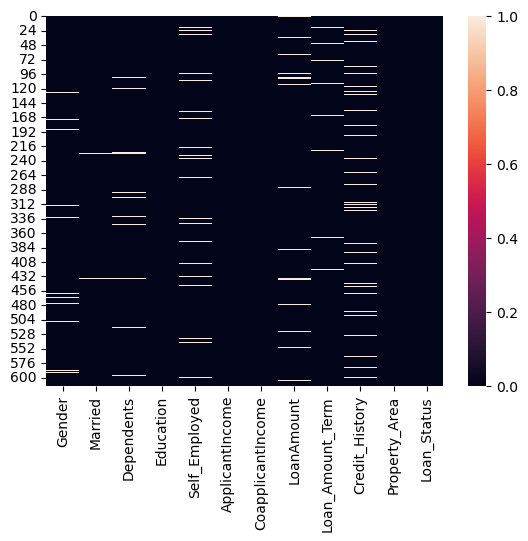

In [13]:
sns.heatmap(la.isnull())

By visualization, we can see the null values.

## IMPUTATION TECHNIQUES

In [14]:
# Removing NaN values in numerical columns
la["LoanAmount"]= la["LoanAmount"].fillna(la["LoanAmount"].median())

In [15]:
# Removing null values in categorical columns

la["Gender"]= la["Gender"].fillna(la["Gender"].mode()[0])
la["Married"]= la["Married"].fillna(la["Married"].mode()[0])
la["Dependents"]= la["Dependents"].fillna(la["Dependents"].mode()[0])
la["Self_Employed"]= la["Self_Employed"].fillna(la["Self_Employed"].mode()[0])
la["Credit_History"]= la["Credit_History"].fillna(la["Credit_History"].mode()[0])
la["LoanAmount"]= la["LoanAmount"].fillna(la["LoanAmount"].mode()[0])
la["Loan_Amount_Term"]= la["Loan_Amount_Term"].fillna(la["Loan_Amount_Term"].mode()[0])

In [16]:
# Checking the NaN values again
la.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that the null values has been removed.

<AxesSubplot:>

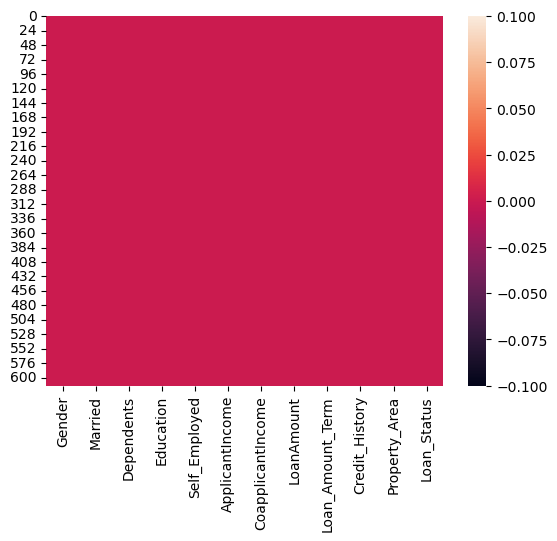

In [17]:
sns.heatmap(la.isnull())

We can see clearly that there is no missing values.

In [18]:
# Checking uniqueness of Loan_Status
la["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

The unique values are present in the target column.

In [19]:
# Checking the list of counts in the target column
la['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We have two counts in Loan_Status namely 'Y' & 'N'. Here 'Y' stands for 'Yes' i.e. the loan of the applicant is approved and 'N' stands for 'No' i.e. the loan apploicant is not approved.

In [20]:
# Checking whether the dataset contains any space
la.loc[la['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


We can see that there is no space in the dataset.

In [21]:
la.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of the dataset. There is no negative values and invalid values are present. 
The mean value and 2nd quantile value has high difference in almost all the columns which means there is a lot of outliers in all the columns.

The count is same which means no null values.
Minimum loan term is 12.
Minimum loan amount is 9.

## DATA VISUALIZATION

### UNIVARIATE ANALYSIS

Y    422
N    192
Name: Loan_Status, dtype: int64


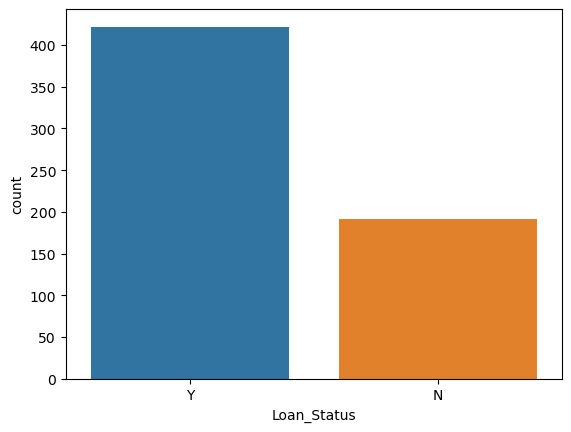

In [22]:
# Visualizing the loan approval status

print(la["Loan_Status"].value_counts())
sns.countplot(la["Loan_Status"])
plt.show()

We can see that 422 applicant's loan are approved and 192 applicant's are rejected.

Male      502
Female    112
Name: Gender, dtype: int64


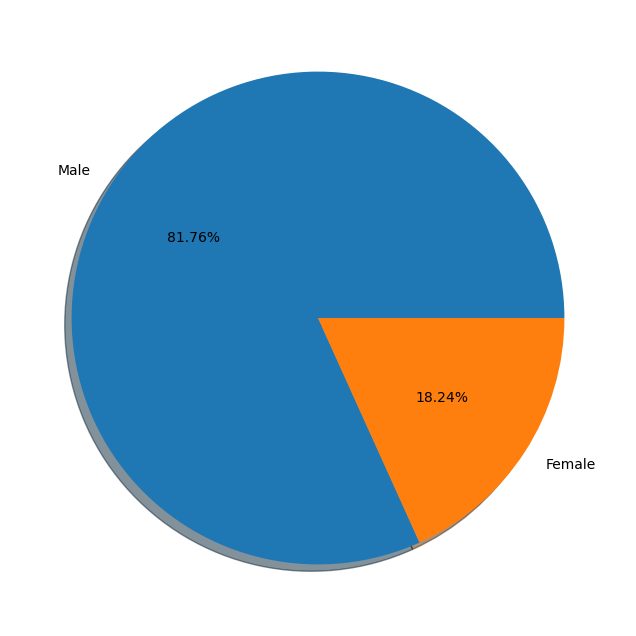

In [23]:
# Visualize the count of applocants Gender
print(la["Gender"].value_counts())
labels= 'Male', 'Female'
fig, ax= plt.subplots(figsize=(10,8))
ax.pie(la['Gender'].value_counts(), labels=labels, autopct= '%1.2f%%', shadow= True)
plt.show()

There are more number of Male applicants applying for loan than the Female. There are about 81% of the Male and only 18% of Female are applying for the loan.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


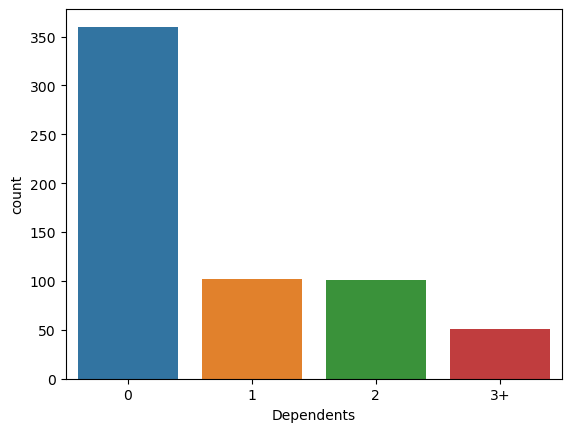

In [24]:
# Visualizing th count of Dependents

print(la["Dependents"].value_counts())
sns.countplot(la["Dependents"])
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents count are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


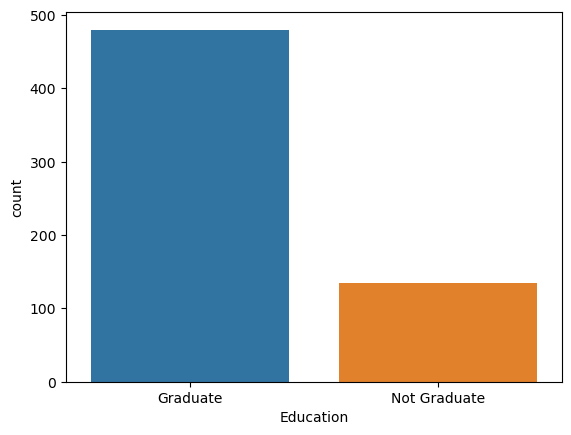

In [25]:
# Visualizing th count of Education

print(la["Education"].value_counts())
sns.countplot(la["Education"])
plt.show()

The count of Graduate applicants is high in counts means that the max number of Graduated applicants are applying for the loan.

No     532
Yes     82
Name: Self_Employed, dtype: int64


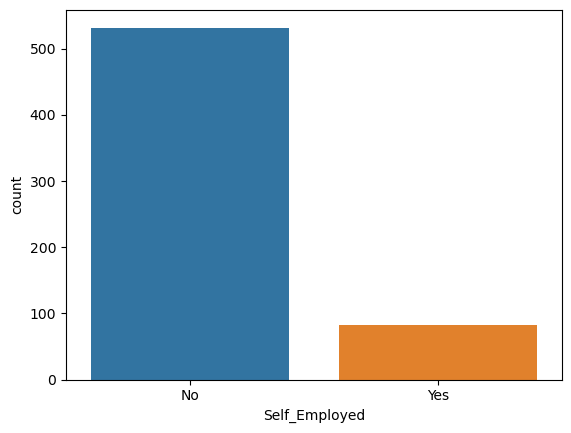

In [26]:
# Visualizing th count of Self_Employed

print(la["Self_Employed"].value_counts())
sns.countplot(la["Self_Employed"])
plt.show()

Most of the applicants are not self employed that means they might working in public sectors and only 82 applicants are self employed and running their own thing.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


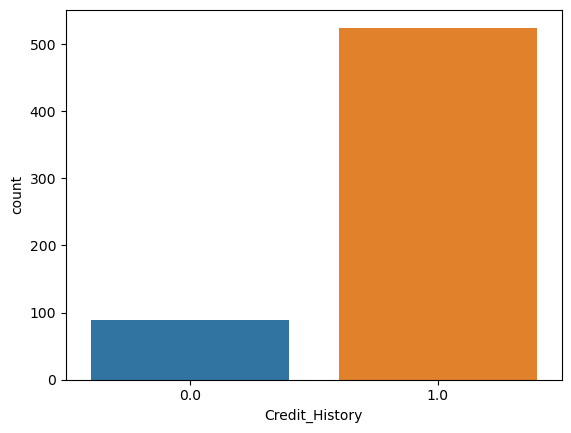

In [27]:
# Visualizing th count of Credit_History

print(la["Credit_History"].value_counts())
sns.countplot(la["Credit_History"])
plt.show()

Most of the applicants who have credit history 1 are high in numbers.

### SKEWNESS

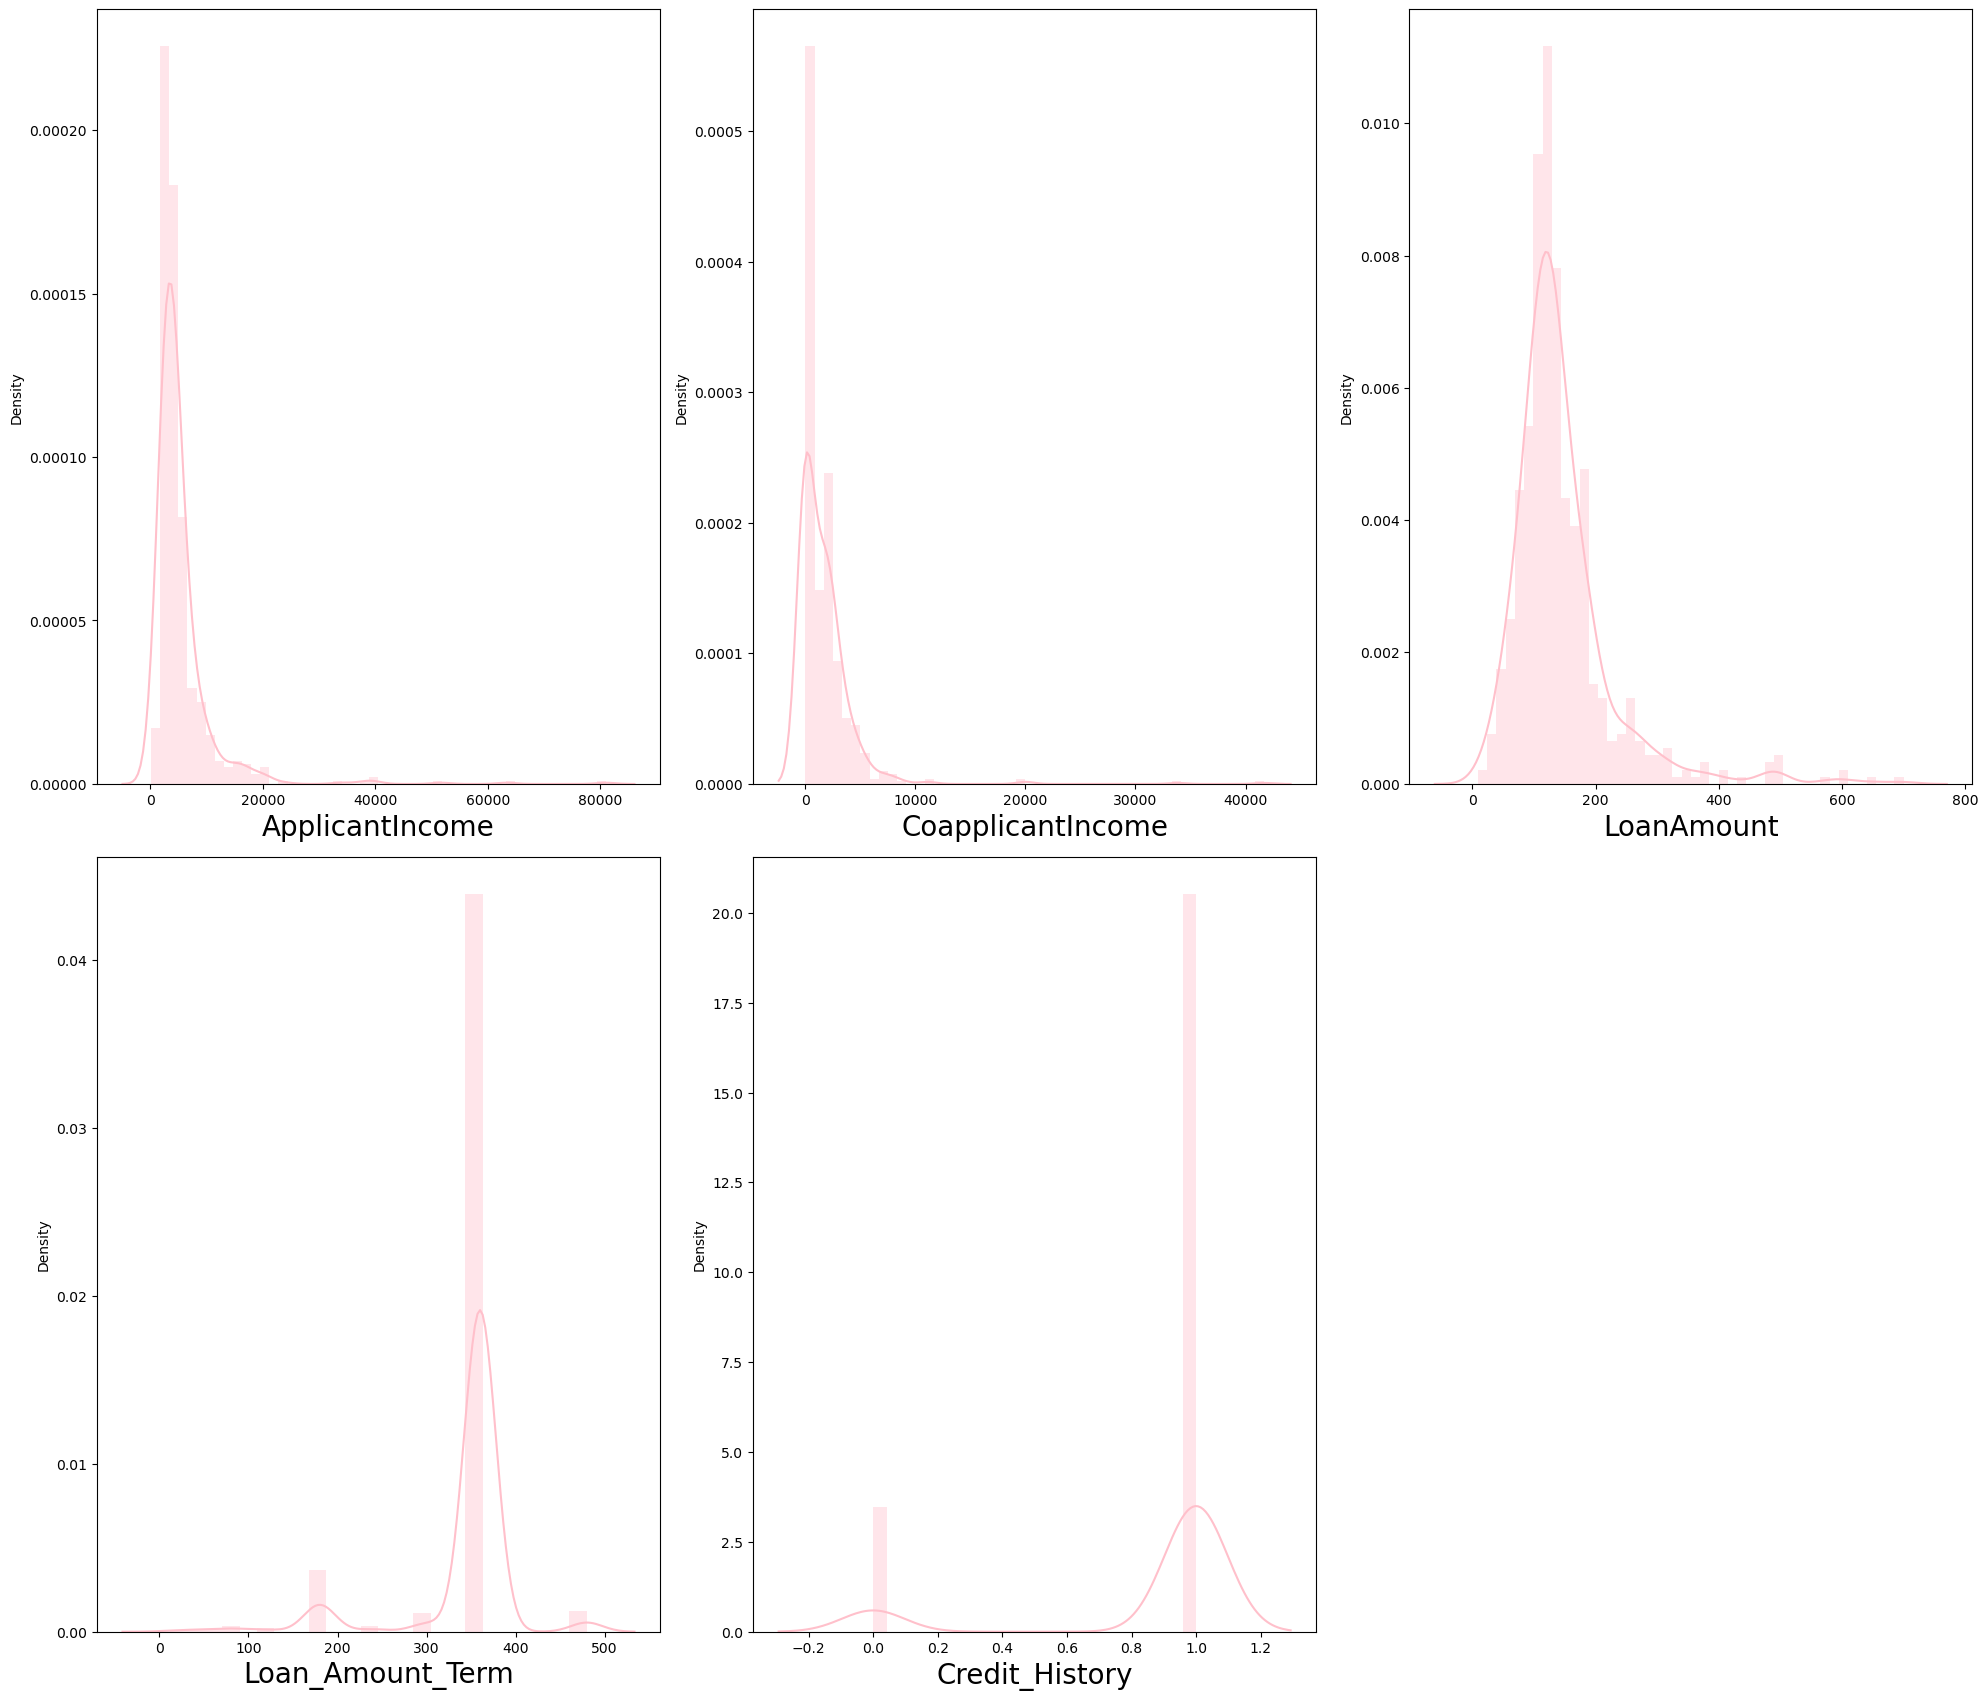

In [28]:
# Checking the data distribution in each column

plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(la[column], color= "pink")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data is not normally distributed in any of the columns. The mean value is greater than the median in ApplicantIncome, CoapplicantIncome, LoanAmount and TotalAmount which means they are skewed to right. The median is greater than the mean in Loan_Amount_Term andCredit_History columns which means they are left skewed. We will remove these skewness.

### BIVARIATE ANALYSIS

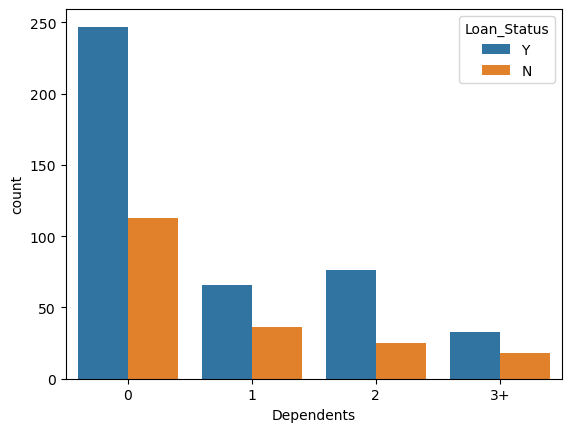

In [29]:
# Visualizing count of Dependents of the applicants on the basis of loan status

sns.countplot(la["Dependents"], hue= la["Loan_Status"])
plt.show()

The count of 0 dependents is high which means most of the applicants have no dependents. Having dependents means having commitments. The 3+ dependents means more tgan 3 applicants have dependents.

The applicants who have dependents 0 are more likely to get their loan approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


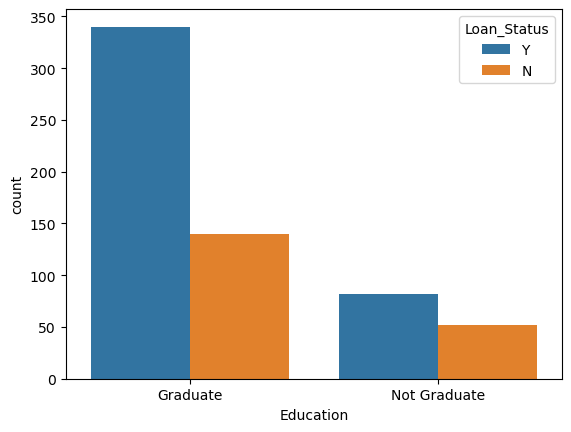

In [30]:
# Visualizing the count of Education

print(la["Education"].value_counts())
sns.countplot(la["Education"], hue= la["Loan_Status"])
plt.show()

Most of the applicants who are applying for loan are graduated and only few are not graduated. Also the applicants who are graduated haveing the tendency of getting loans than who are not.

No     532
Yes     82
Name: Self_Employed, dtype: int64


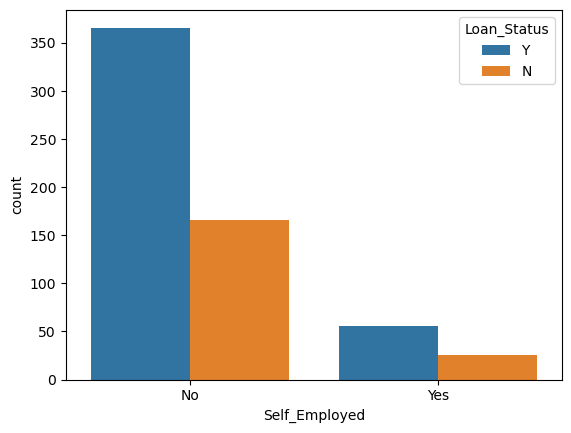

In [31]:
# Visualizing the count of Self_Employed

print(la["Self_Employed"].value_counts())
sns.countplot(la["Self_Employed"], hue= la["Loan_Status"])
plt.show()

Most of the applicants are not self employed means they are working in public sectors and only a few of the applicants are self employed.

The applicants who are not self employed having the tendency of getting their loans than self employed.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


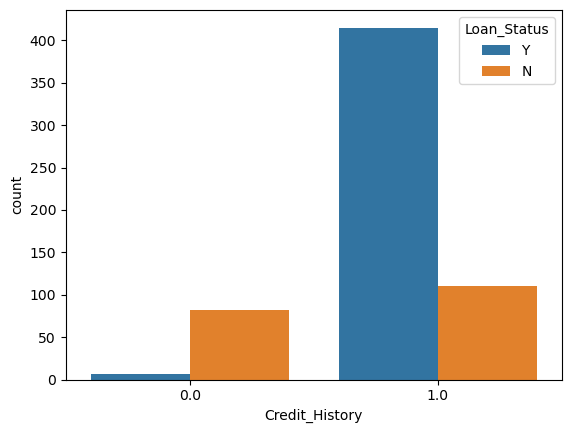

In [32]:
# Visualizing the count of Credit_History

print(la["Credit_History"].value_counts())
sns.countplot(la["Credit_History"], hue= la["Loan_Status"])
plt.show()

The credit history gives the information of the applicants who took loan in the past have cleared or not. Here we can see that the applicants who have credit history 1 have high counts which means most of the applicants have cleared their previous loan only few of them.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


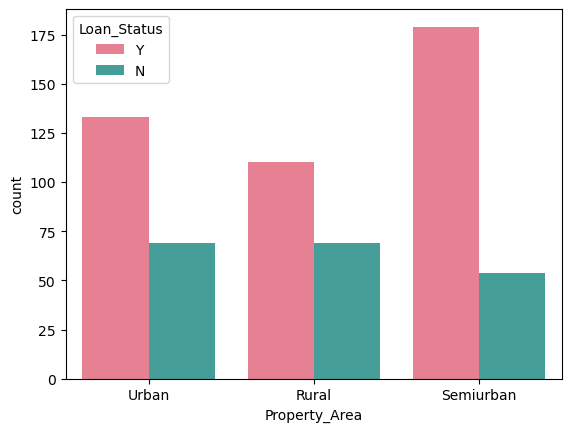

In [33]:
# Visualizing the count of Property_Area

print(la["Property_Area"].value_counts())
sns.countplot(la["Property_Area"], hue= la["Loan_Status"], palette= 'husl')
plt.show()

Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval.

Male      502
Female    112
Name: Gender, dtype: int64


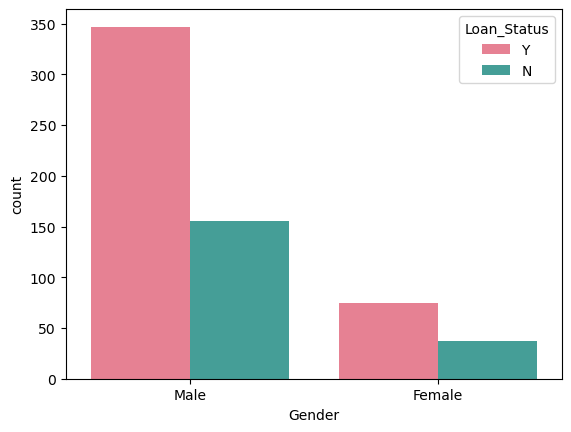

In [34]:
# Visualizing the count of Gender

print(la["Gender"].value_counts())
sns.countplot(la["Gender"], hue= la["Loan_Status"], palette= 'husl')
plt.show()

The male applicants who have applied for the loan have got approved compared to the female applicants.

Yes    401
No     213
Name: Married, dtype: int64


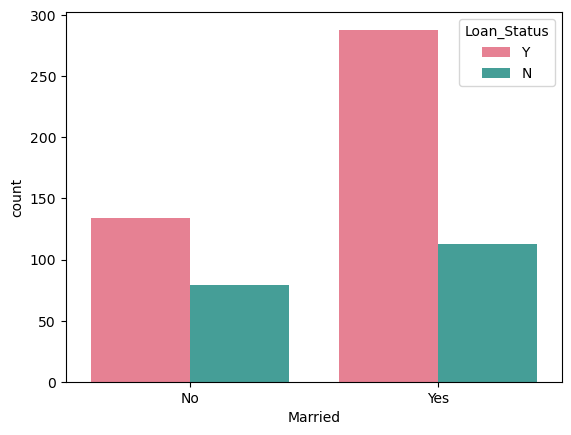

In [35]:
# Visualizing the count of Married

print(la["Married"].value_counts())
sns.countplot(la["Married"], hue= la["Loan_Status"], palette= 'husl')
plt.show()

There are more number of Male applicants who are applying for loan tham compared to Female applicants. Also more Male applicant's loans got approved compared to Female.

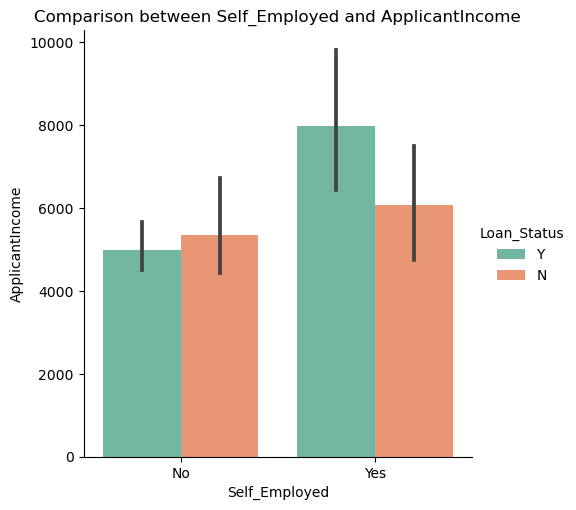

In [36]:
# Checking relation between Self_Employed and ApplicantIncome

sns.catplot(x= 'Self_Employed', y= "ApplicantIncome", data=la, kind= "bar", hue= 'Loan_Status', palette= "Set2")
plt.title("Comparison between Self_Employed and ApplicantIncome")
plt.show()

The applicants whose loan got approved have avg income and have their own business means they are self employed.

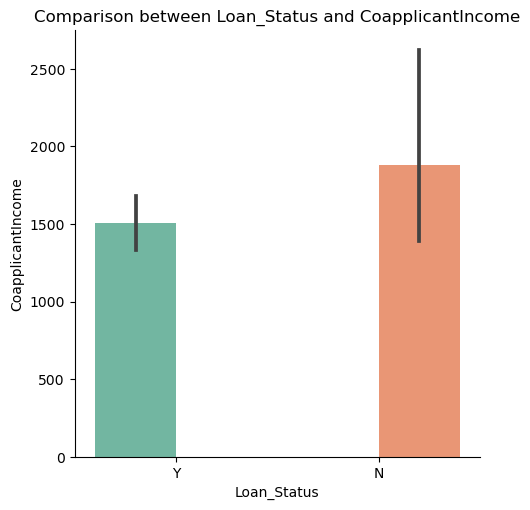

In [37]:
# Checking relation between Loan_Status and CoapplicantIncome

sns.catplot(x= 'Loan_Status', y= "CoapplicantIncome", data=la, kind= "bar", hue= 'Loan_Status', palette= "Set2")
plt.title("Comparison between Loan_Status and CoapplicantIncome")
plt.show()

The coapplicants who got loan have avg income.

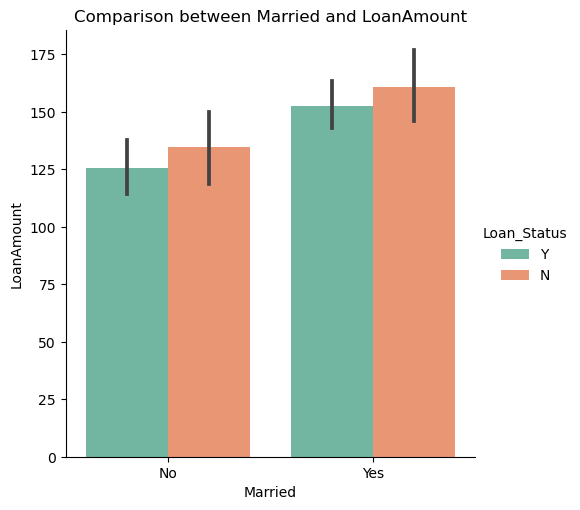

In [38]:
# Checking relation between LoanAmount and Married

sns.catplot(x= "Married", y= "LoanAmount", data=la, kind= "bar", hue= 'Loan_Status', palette= "Set2")
plt.title("Comparison between Married and LoanAmount")
plt.show()

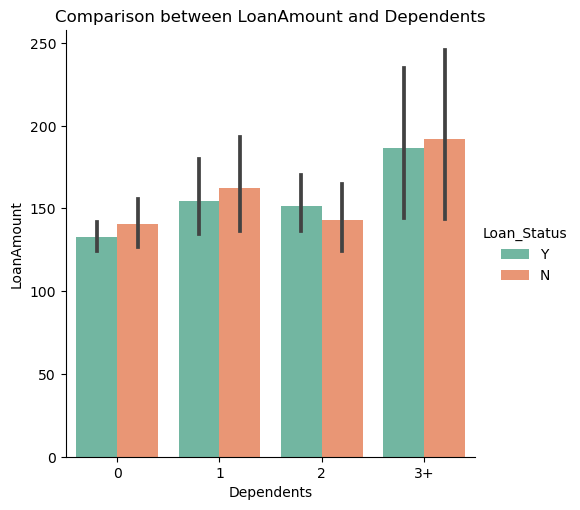

In [39]:
# Checking relation between LoanAmount and Dependents

sns.catplot(x= "Dependents", y= "LoanAmount", data=la, kind= "bar", hue= 'Loan_Status', palette= "Set2")
plt.title("Comparison between LoanAmount and Dependents")
plt.show()

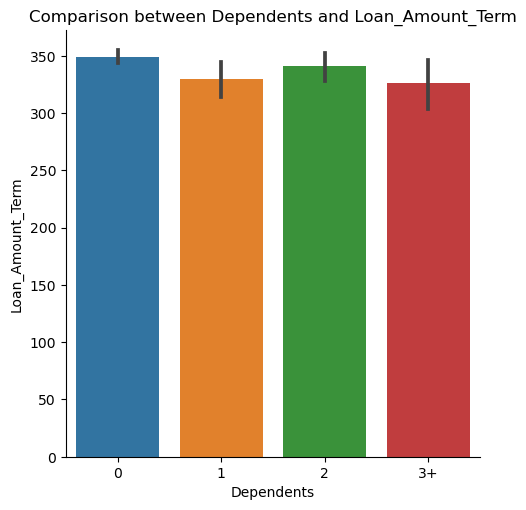

In [40]:
# Checking relation between Loan_Amount_Term and Dependents

sns.catplot(x= "Dependents", y= "Loan_Amount_Term", data=la, kind= "bar")
plt.title("Comparison between Dependents and Loan_Amount_Term")
plt.show()

The applicants 0 dependents have high loan amount term followed by the dependents 2.

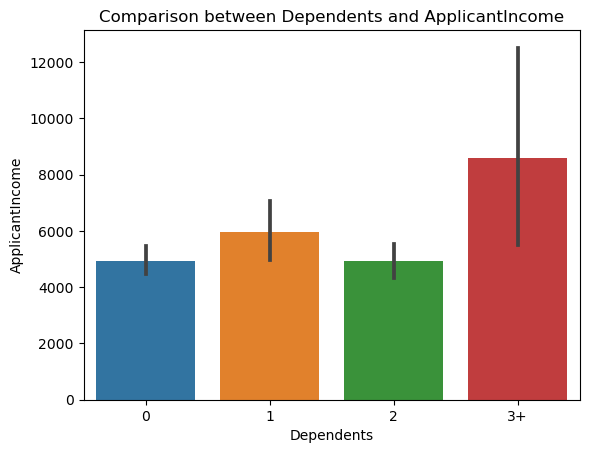

In [41]:
# Let's check the applicant income as per dependents

sns.barplot(x= "Dependents", y= "ApplicantIncome", data=la)
plt.title("Comparison between Dependents and ApplicantIncome")
plt.show()

The dependents of applicants is more than 3 has high avg income and with 2 has less income.

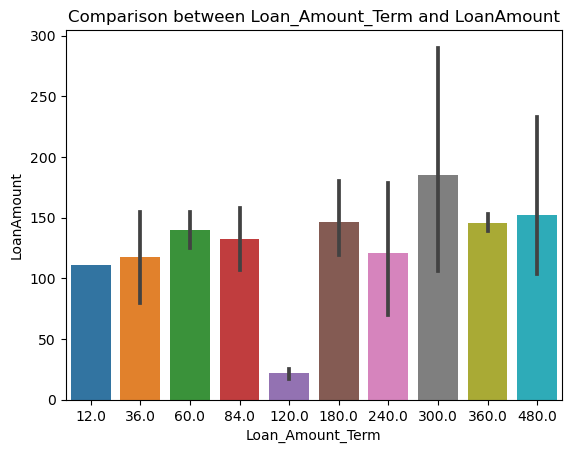

In [42]:
# Comparing Loan_Amount_Term and LoanAmount

sns.barplot(x= "Loan_Amount_Term", y= "LoanAmount", data=la)
plt.title("Comparison between Loan_Amount_Term and LoanAmount")
plt.show()

The loan amount term 300.0 is high with loan amount compared to others.

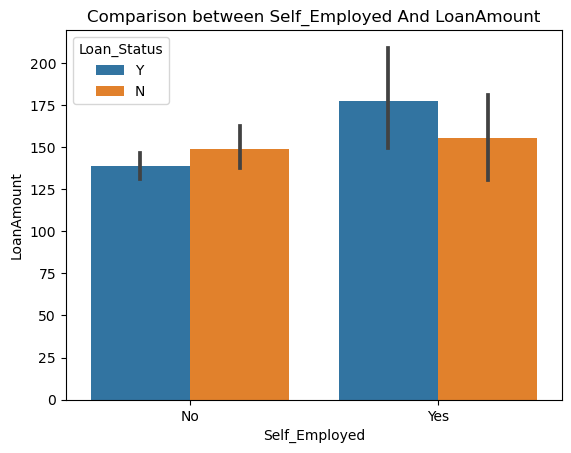

In [43]:
# Let's comapre the LoanAmount with Self_Employed

sns.barplot(x= "Self_Employed", y= "LoanAmount", data=la, hue= "Loan_Status")
plt.title("Comparison between Self_Employed And LoanAmount")
plt.show()

The avg loan amount demanded by self employed is more compared to the other also the loan approval for seld employed applicants with avg loan amount is high compare to the applicants who are not self employed.

### MULTIVARIATE ANALYSIS

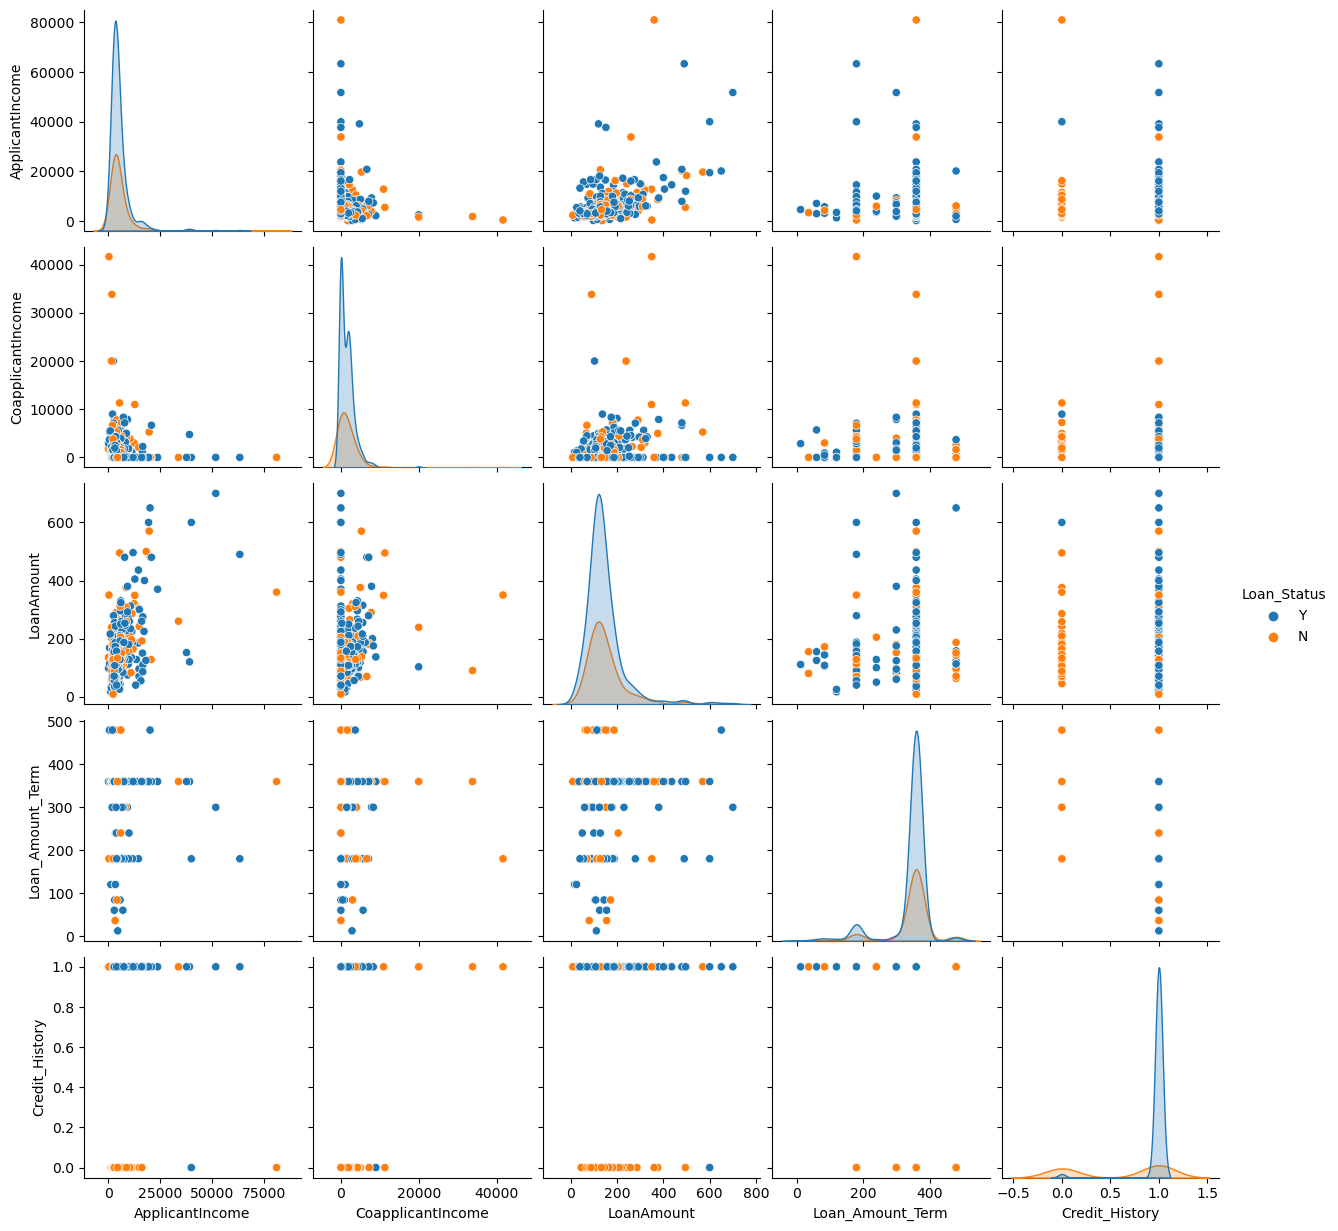

In [44]:
# Checking the pairwise relation
sns.pairplot(la, hue= "Loan_Status")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status".

Here, we can observe the relation between the features and label.

We can also observe that the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and ToytalIncome.

We can also observe the correlation in some of the columns. There are outliers present in some of the columns.

### IDENTIFYING THE OUTLIERS

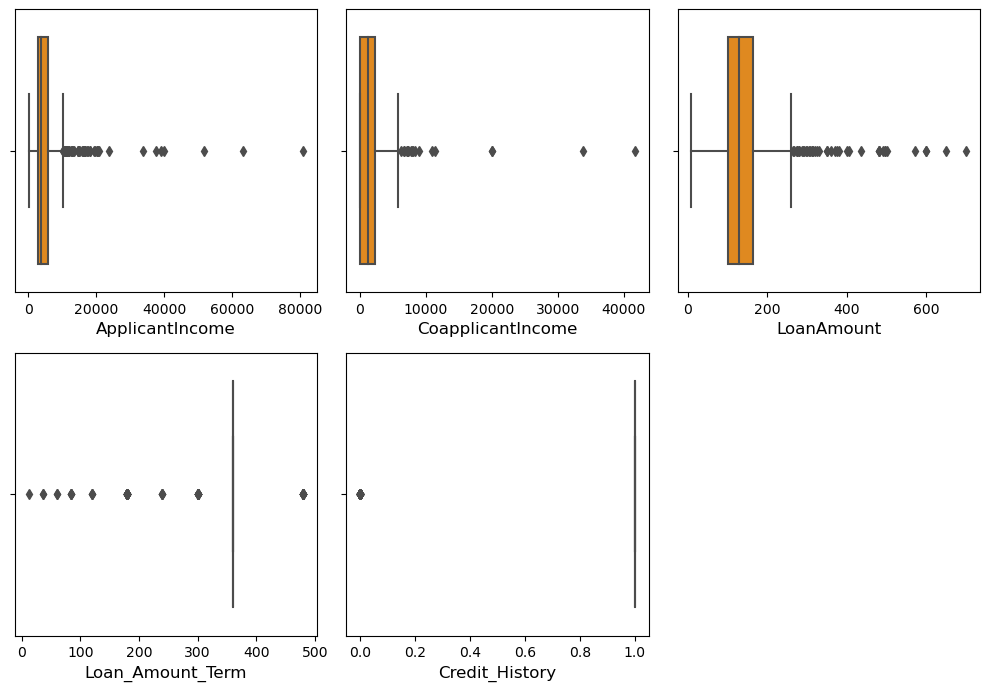

In [45]:
# Identifying the outliers 

plt.figure(figsize=(10,10), facecolor= 'white')
plotnumber=1
for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.boxplot(la[column], color= "darkorange")
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can observe the outliers present in all the columns. But the columns Credit_History has only two unique values so no need to remove outliers in this column. let's remove outliers in remaining columns.

### REMOVING OUTLIERS

In [46]:
la.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## ZSCORE METHOD

In [47]:
# Numerical columns 
features= la[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

# Using zscore method
from scipy.stats import zscore

z= np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [48]:
# Creating new dataframe

new_la= la[(z<3).all(axis=1)]
new_la

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This is the new dataframe after removing the outliers. Here, we have removed the outliers whose ZScore is less than 3.

In [49]:
# Shape of original dataset
la.shape

(614, 12)

In [50]:
# Shape of new dataframe
new_la.shape

(577, 12)

In [51]:
# Checking the dataloss

data_loss= (614-577)/614*100
data_loss

6.026058631921824

I am losing only 6% data.

Let's remove the outliers and check the dataloss using IQR method.

## IQR METHOD

### (Inter Quantile Range)

In [52]:
# 1st Quantile
Q1= features.quantile(0.25)

# 3rd Quantile
Q3= features.quantile(0.75)

# IQR
IQR= Q3-Q1
la1= la[~((la< (Q1-1.5*IQR)) | (la> (Q3+1.5*IQR))).any(axis=1)]

In [53]:
la1.shape

(459, 12)

Using IQR Method, the dataframe has 459 rows and 12 columns.

In [54]:
# Let's check the dataloss

data_loss= (614-459)/614*100
data_loss

25.2442996742671

Using IQR Method, I am losing 25% of the data, so I will consider ZScore Method.

### CHECKING FOR SKEWNESS

In [55]:
new_la.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

The skewness present in all the above columns. Here, the columns Credit_History and Loan_Amount_Term have categorical data of int type so no need to remove the skewness in these columns.

### REMOVING SKEWNESS

In [56]:
skew= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method= 'yeo-johnson')
'''
parameters:
method= 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod= 'box-cox' or 'yeo-johnson'\n"

In [57]:
new_la[skew]= pt.fit_transform(new_la[skew].values)
new_la[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [58]:
new_la.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

I have removed the skewness using yeo-johnson method. The skewness has been removed in all the numerical int type columns.

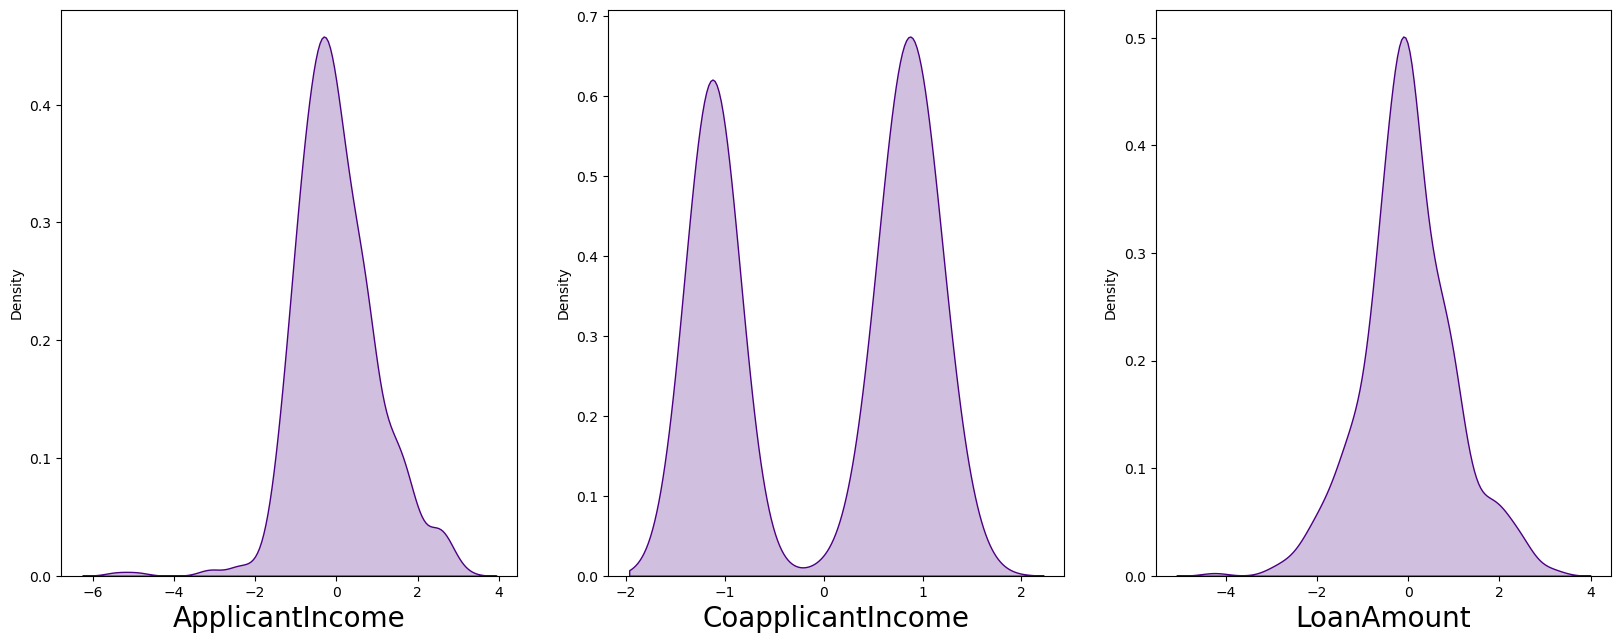

In [59]:
# After removing skewness, let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber=1

for column in new_la[skew]:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(new_la[column], color= 'indigo', kde_kws= {"shade": True}, hist= False)
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

The data is almost normal also I have removed the skewness that we can notice in the above distplot.

### ENCODING USING LABEL ENCODER

In [60]:
categorical_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [61]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
new_la[categorical_col]= new_la[categorical_col].apply(le.fit_transform)

In [62]:
new_la[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


The categorical columns have been converted into numerical columns by using Label Encoding.

### CORRELATION

In [63]:
# Checking the Correlation between features and target
cor= new_la.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


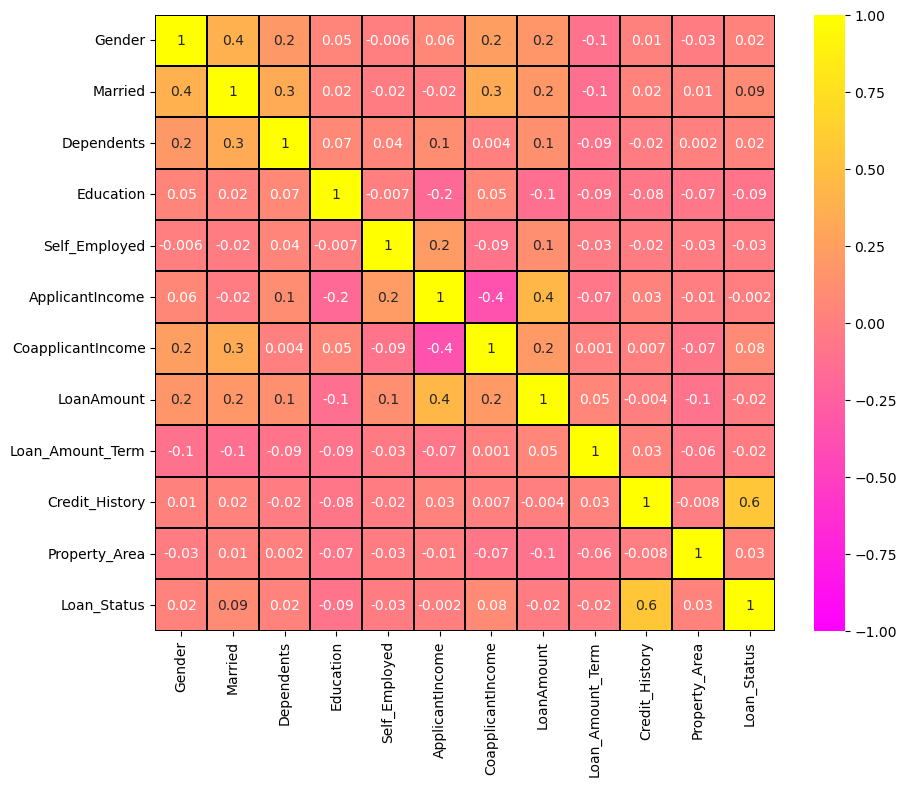

In [64]:
# Visualizing the correlation matrix by plotting heatmap

plt.figure(figsize=(10,8))
sns.heatmap(new_la.corr(), linewidths= .1, vmin= -1, vmax=1, fmt= '.1g', annot= True, linecolor= "black", annot_kws= {'size':10}, cmap= "spring")
plt.yticks(rotation=0);

The target column Loan_Status is highly positively correlated with the feature Credit_History.

The other features have very less correlation with the target column.

Also, we can notice there is no multicollinearity issue in the features. Features having moderate level of correlation with each other.

ApplicantIncome and Gender is very less correlated with the target.

In [65]:
cor['Loan_Status'].sort_values(ascending= False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
LoanAmount          -0.023609
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

We can see the positive and negative correlation between the target and the features.

### Visualizing the correlation between label and features using bar plot

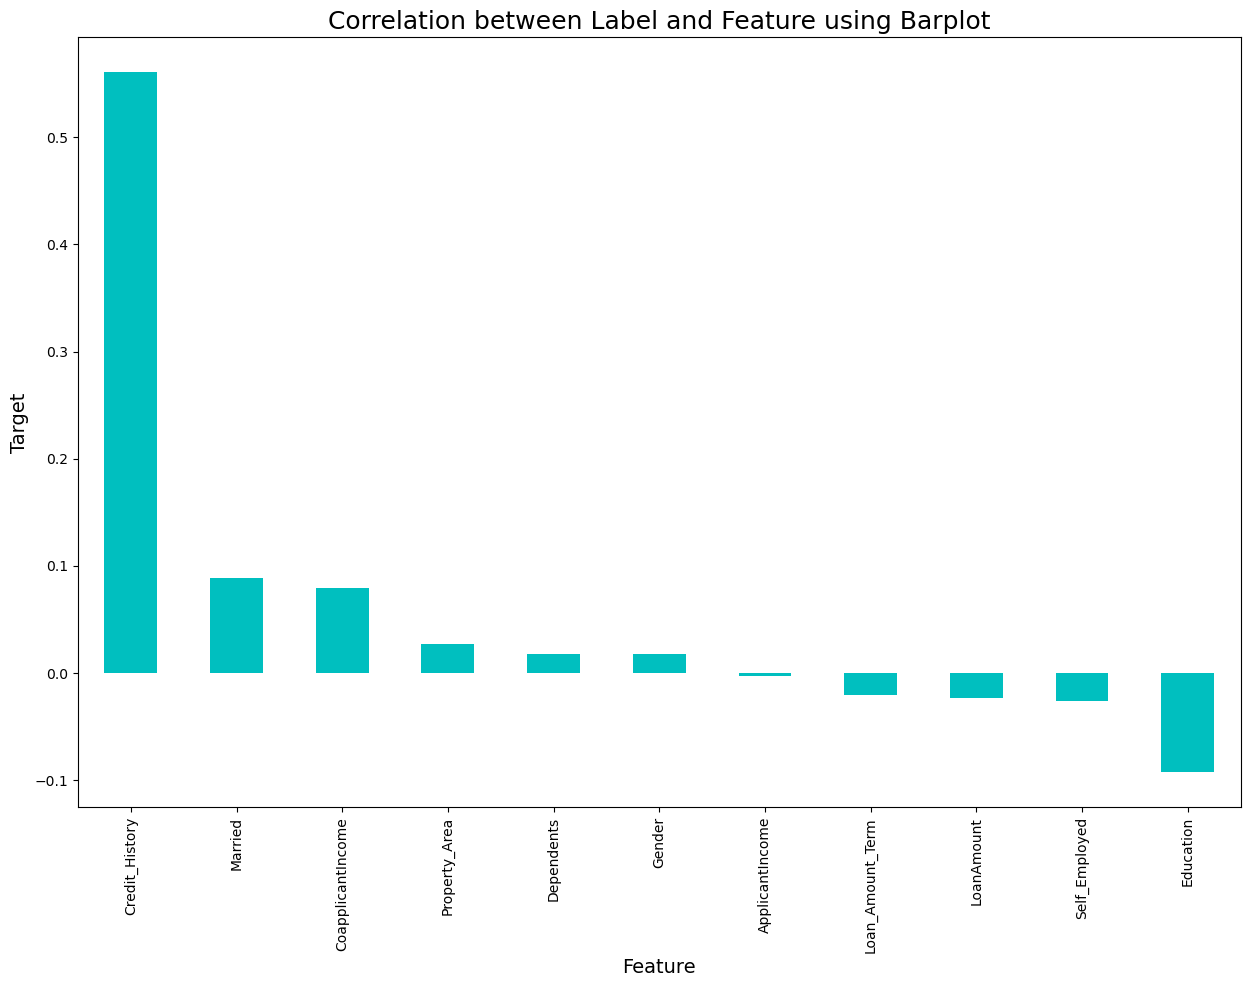

In [66]:
plt.figure(figsize=(15,10))
new_la.corr()['Loan_Status'].sort_values(ascending= False).drop(['Loan_Status']).plot(kind= 'bar', color= 'c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Correlation between Label and Feature using Barplot', fontsize=18)
plt.show()

Here the columns ApplicantIncome has very less correlation with the target so we can drop this column if necessary.

### Seperating the feature and label variables into x and y

In [67]:
x= new_la.drop("Loan_Status", axis=1)
y= new_la["Loan_Status"]

In [68]:
# Dimension of x
x.shape

(577, 11)

In [69]:
# Dimension of y
y.shape

(577,)

## STANDARD SCALER

In [70]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
x= pd.DataFrame(ss.fit_transform(x), columns= x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


I have scaled the data using stndard scaler method to overcome the issue of data biasness.

In [71]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

## OVERSAMPLING

In [72]:
# Oversampling the data

from imblearn.over_sampling import SMOTE

sm= SMOTE()
x, y= sm.fit_resample(x,y)

In [73]:
# Checking the value counts again

y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

The data is balaced now. Since, the highest count of the target is 398 so the data is balanced by oversampling all the classes to the count 398.

In [74]:
# DataFrame after preprocessing and cleaning
new_la.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


Now let's build the model.

### Finding Best Random State and Accuracy

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=i)
    rfc= RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred= rfc.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, " on Random State ",maxRS)

Best Accuracy is  0.8870292887029289  on Random State  96


### Creating train_test_split

In [76]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.30, random_state= maxRS)

## CLASSIFICATION ALGORITHMS

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

## DECISION TREE CLASSIFIER

In [78]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Prediction
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.8200836820083682
[[99 19]
 [24 97]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       118
           1       0.84      0.80      0.82       121

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



The accuracy using DecisionTreeClassifier is 82%.

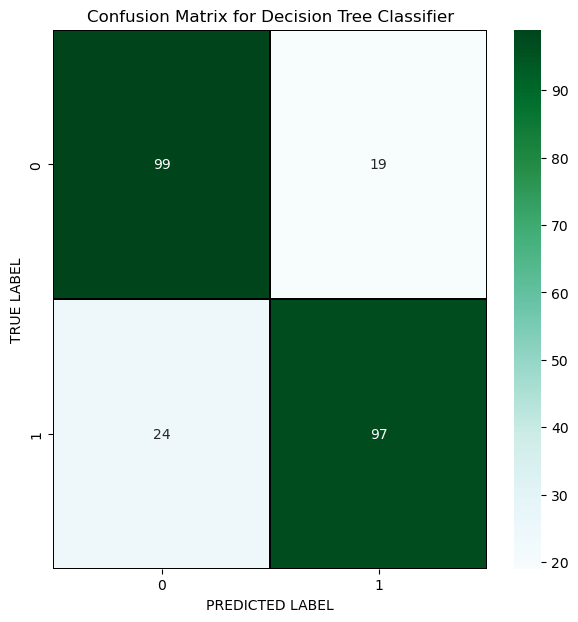

In [79]:
# Let's plot for dtc

cm= confusion_matrix(y_test, preddtc)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

This is the confusion matrix for DTC where, we can observe the true positive rate, false positive rate, true negative rate and false negative rate.

## RANDOM FOREST CLASSIFIER

In [80]:
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)

# Prediction
predrfc= rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.8870292887029289
[[ 99  19]
 [  8 113]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       118
           1       0.86      0.93      0.89       121

    accuracy                           0.89       239
   macro avg       0.89      0.89      0.89       239
weighted avg       0.89      0.89      0.89       239



The accuracy using RandomForestClassifier is 88.70%.

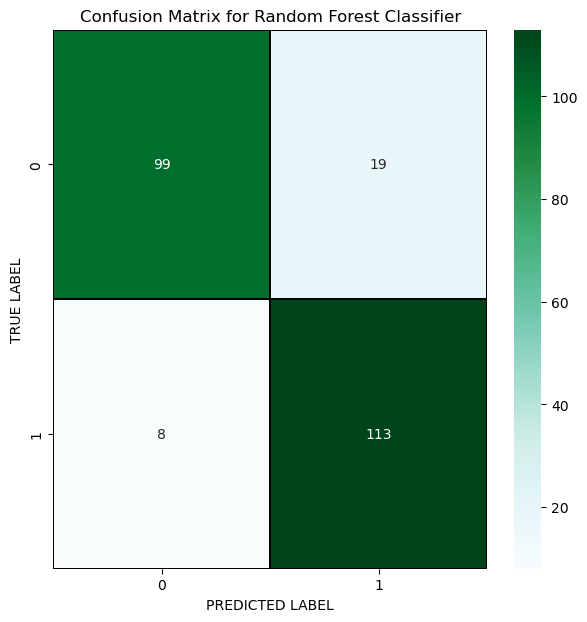

In [81]:
# Let's plot for rfc

cm= confusion_matrix(y_test, predrfc)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## LOGISTIC REGRESSION

In [82]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

# Prediction
predlr= lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.7405857740585774
[[ 71  47]
 [ 15 106]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       118
           1       0.69      0.88      0.77       121

    accuracy                           0.74       239
   macro avg       0.76      0.74      0.73       239
weighted avg       0.76      0.74      0.74       239



The accuracy using LogisticRegression is 74.05%.

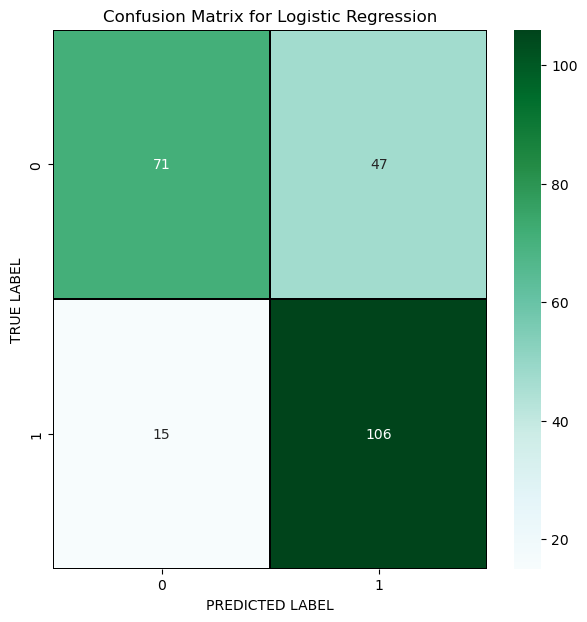

In [83]:
# Let's plot for lr

cm= confusion_matrix(y_test, predlr)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## SVM

In [84]:
svc= SVC()
svc.fit(x_train, y_train)

# Prediction
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7405857740585774
[[ 72  46]
 [ 16 105]]
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       118
           1       0.70      0.87      0.77       121

    accuracy                           0.74       239
   macro avg       0.76      0.74      0.74       239
weighted avg       0.76      0.74      0.74       239



The accuracy using SVC is 74.05%.

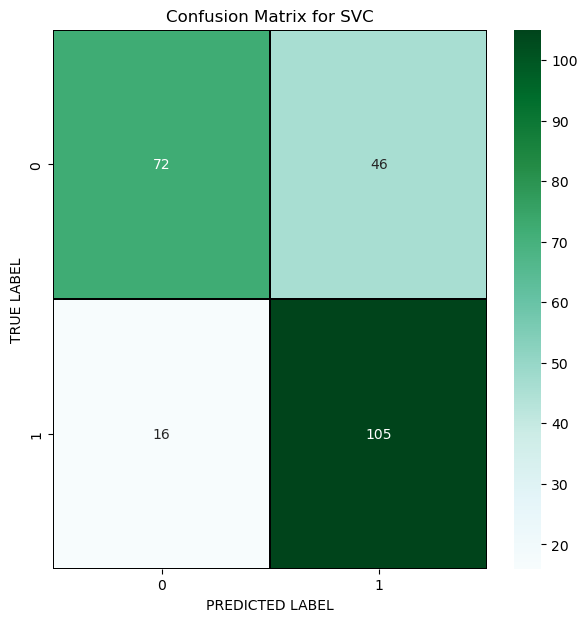

In [85]:
# Let's plot for svc

cm= confusion_matrix(y_test, predsvc)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVC')
plt.show()

## KNEIGHBORS CLASSIFIER

In [86]:
knn= KNN()
knn.fit(x_train, y_train)

# Prediction
predknn= knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7531380753138075
[[91 27]
 [32 89]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       118
           1       0.77      0.74      0.75       121

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239



The accuracy using KNN is 75.31%.

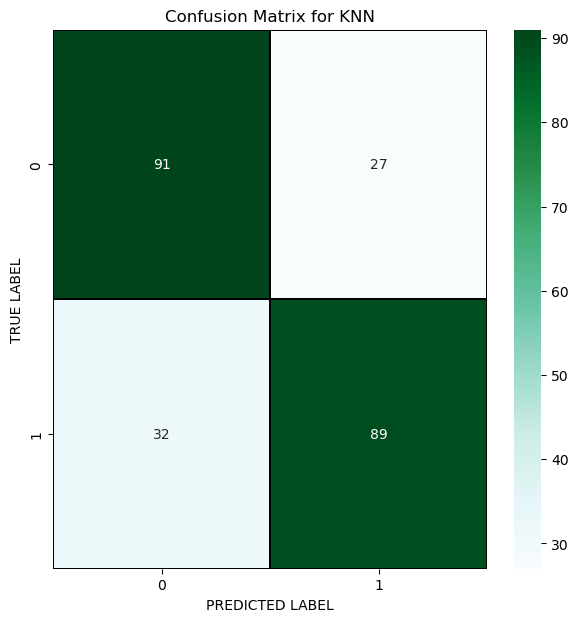

In [87]:
# Let's plot for knn

cm= confusion_matrix(y_test, predknn)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN')
plt.show()

## GRADIENT BOOSTING CLASSIFIER

In [88]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train, y_train)

# Prediction
predgbc= gbc.predict(x_test)
print(accuracy_score(y_test, predgbc))
print(confusion_matrix(y_test, predgbc))
print(classification_report(y_test, predgbc))

0.8410041841004184
[[ 91  27]
 [ 11 110]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       118
           1       0.80      0.91      0.85       121

    accuracy                           0.84       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.85      0.84      0.84       239



The accuracy using GradientBoostingClassifier is 84.10%.

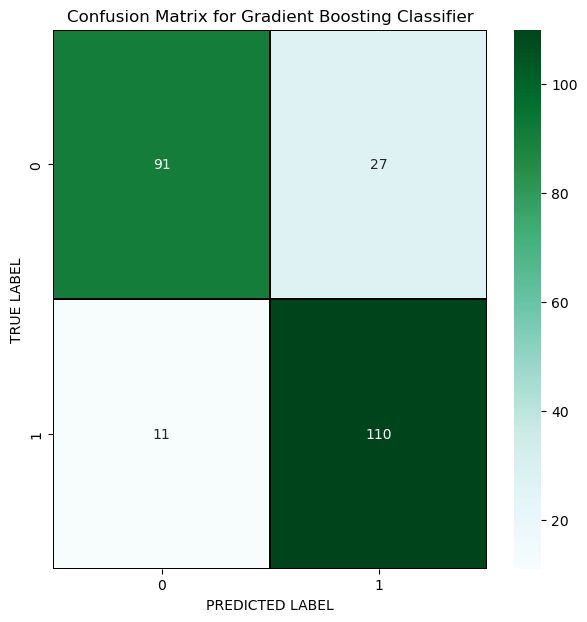

In [89]:
# Let's plot for gbc

cm= confusion_matrix(y_test, predgbc)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## ADA BOOST CLASSIFIER

In [90]:
abc= AdaBoostClassifier()
abc.fit(x_train, y_train)

# Prediction
predabc= abc.predict(x_test)
print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test, predabc))

0.799163179916318
[[ 87  31]
 [ 17 104]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       118
           1       0.77      0.86      0.81       121

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



The accuracy using Ada Boost Classifier is 79.91%.

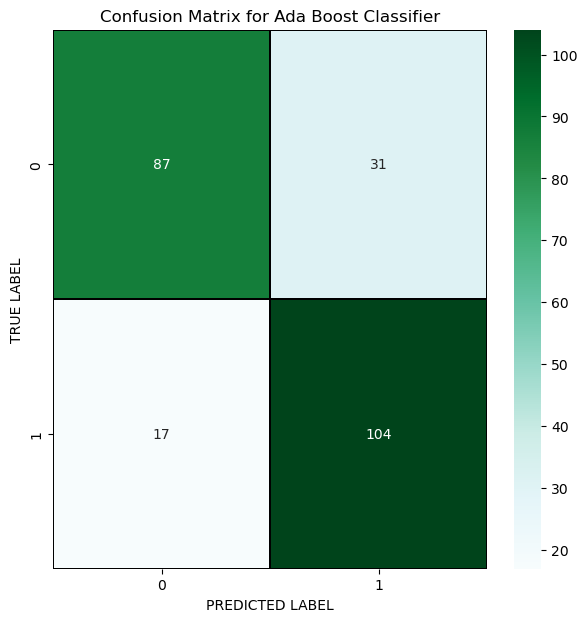

In [91]:
# Let's plot for abc

cm= confusion_matrix(y_test, predabc)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Ada Boost Classifier')
plt.show()

## GAUSSIAN NB CLASSIFIER

In [92]:
nb= GaussianNB()
nb.fit(x_train, y_train)

# Prediction
prednb= nb.predict(x_test)
print(accuracy_score(y_test, prednb))
print(confusion_matrix(y_test, prednb))
print(classification_report(y_test, prednb))

0.7071129707112971
[[ 61  57]
 [ 13 108]]
              precision    recall  f1-score   support

           0       0.82      0.52      0.64       118
           1       0.65      0.89      0.76       121

    accuracy                           0.71       239
   macro avg       0.74      0.70      0.70       239
weighted avg       0.74      0.71      0.70       239



The accuracy using GaussianNB is 70.71%.

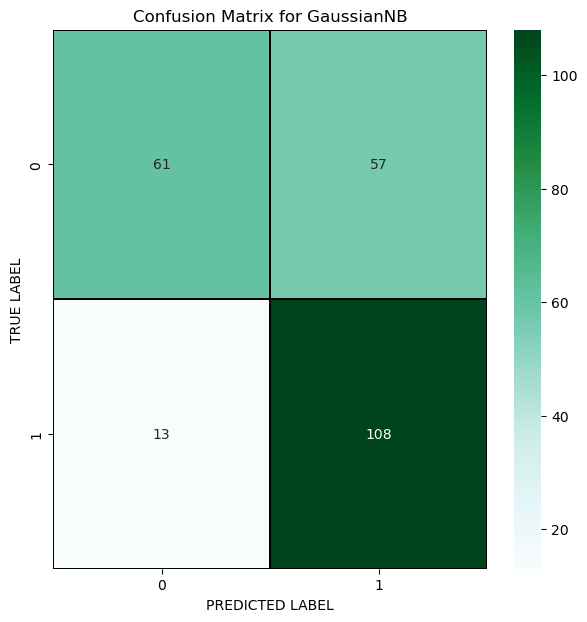

In [93]:
# Let's plot for nb

cm= confusion_matrix(y_test, prednb)

x_axis_labels= ["0", "1"]
y_axis_labels= ["0", "1"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "BuGn", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for GaussianNB')
plt.show()

## Checking the Cross Validation Score

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
# CV Score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7701650943396228


In [96]:
# CV Score for Random Forest Classifier
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8518317610062894


In [97]:
# CV Score for Logistic Regression Classifier
print(cross_val_score(lr,x,y,cv=5).mean())

0.6972327044025157


In [98]:
# CV Score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7223427672955975


In [99]:
# CV Score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7575707547169812


In [100]:
# CV Score for Gradient Boosting Classifier
print(cross_val_score(gbc,x,y,cv=5).mean())

0.7953616352201258


In [101]:
# CV Score for Ada Boost Classifier
print(cross_val_score(abc,x,y,cv=5).mean())

0.7450707547169811


In [102]:
# CV Score for Gaussian NB Classifier
print(cross_val_score(nb,x,y,cv=5).mean())

0.6934827044025157


Above are the Cross Validation Score for the Models.

## HYPER PARAMETER TUNING

In [103]:
from sklearn.model_selection import GridSearchCV

In [105]:
# KNeighbors Classifier

parameters= {'n_neighbors':[2,3,4,5,6],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[10,20,30,40,50],
            'weights':['uniform', 'distance'],
            'p':[1,2,3,4,5]}

In [106]:
gcv= GridSearchCV(KNN(), parameters, cv=5)

In [107]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [108]:
gcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

These are the best parameters that we have got for KNN classifier.

In [110]:
loan= KNN(algorithm= 'auto', leaf_size=10, n_neighbors=4, weights= 'distance', p=1)
loan.fit(x_train, y_train)
pred= loan.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

84.10041841004184


The accuracy after Hyper Parameter Tuning of the best model KNN is 84.10%.

### Plotting ROC and compare AUC for all the models used:

In [111]:
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import plot_roc_curve

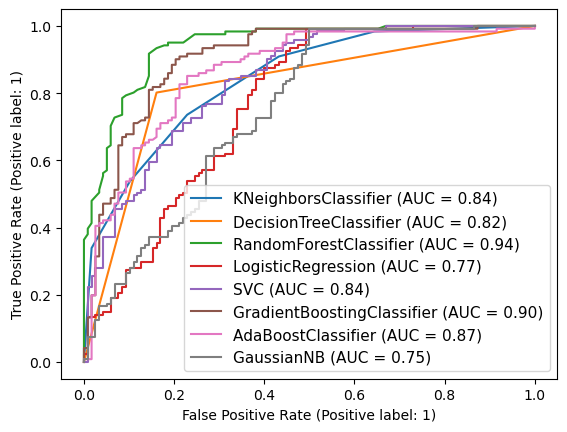

In [112]:
disp= plot_roc_curve(knn, x_test, y_test)
plot_roc_curve(dtc, x_test, y_test, ax= disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax= disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax= disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax= disp.ax_)
plot_roc_curve(gbc, x_test, y_test, ax= disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax= disp.ax_)
plot_roc_curve(nb, x_test, y_test, ax= disp.ax_)

plt.legend(prop= {'size':11}, loc= 'lower right')
plt.show()

This is the AUC-ROC curve for the models that we have used and is plotted False Positive Rate against True Positive Rate.

### Plotting ROC and compare AUC for the best model KNN:

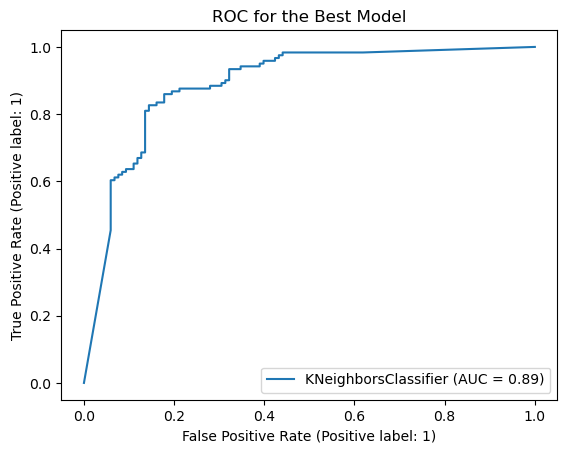

In [113]:
plot_roc_curve(loan, x_test, y_test)
plt.title("ROC for the Best Model")
plt.show()

## SAVING THE MODEL

In [114]:
import joblib
joblib.dump(loan, "Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

### PREDICTING THE SAVED MODEL

In [115]:
model= joblib.load("Loan_Application_Status.pkl")

# Prediction
prediction= model.predict(x_test)
prediction

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [116]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index= ["Prediction", "Original"]).T

,Prediction,Original
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
234,0,0
235,0,0
236,0,0
237,0,0
